## Import libraries (Because of the problems of kernel crashing, we may import libraries in each cell.)

In [1]:
!pip install python-igraph
!pip install cairocffi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 2.4 MB/s eta 0:00:00


In [15]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import matplotlib.pyplot as plt

In [3]:
import itertools

# Loading the data

In [4]:
reddit_network = pd.read_csv('/content/reddit_posts.csv')

In [5]:
reddit_network

Unnamed: 0       id     created      subreddit  \
0              0  17ihm4s  2023-10-28      pokemongo   
1              1  12oidef  2023-04-16      pokemongo   
2              2  13anrf9  2023-05-07      pokemongo   
3              3  11g2etk  2023-03-02      pokemongo   
4              4  16ge9r6  2023-09-12      pokemongo   
...          ...      ...         ...            ...   
1740        1740  16h469m  2023-09-12  pokemongobrag   
1741        1741  13zjnbm  2023-06-03  pokemongobrag   
1742        1742  13cina7  2023-05-09  pokemongobrag   
1743        1743  16nhq3i  2023-09-20  pokemongobrag   
1744        1744  121txhc  2023-03-25  pokemongobrag   

                                                  title  \
0     Had a very scary encounter playing Pokémon go ...   
1     Caught a Shiny Lillipup. I live in the country...   
2                Niantic has won, I'm giving up for now   
3     Can we take a moment to talk about how much of...   
4                            Deceased Pokémon Go friend   
...                                                 ...   
1740               Did anyone ever have this happen?!?!   
1741  (Antibrag) Wow, such good odds 1/20 for the sh...   
1742     Not a brag but I need karma for PoGo subreddit   
1743  My Rare Candy XL sink. Most two-year-old playe...   
1744                             Did I break the game ?   

                                               selftext             author  \
0     In all my years playing this game I’ve never h...  The_big_strombilo   
1                                                   NaN             twjagd   
2     I started playing Pokémon Go back in 2016 when...       xbzfunjumper   
3                                                   NaN      BiohazardSS57   
4     While looking through my Pokémon and trying to...   prettyflyforafry   
...                                                 ...                ...   
1740  So I was catching mankeys during the spotlight...        BigblueDabs   
1741  Sometimes I believe that the game itself lock ...    No_Jeweler_5752   
1742                                  Finally got this!             Virxae   
1743  It's always very happy to see Kyogre, Swampert...      speedcreature   
1744                                                NaN       RobinJeans21   

     author_fullname  upvote_ratio   ups  num_comments  
0        t2_5s77ftud          0.96  4865           517  
1        t2_15skyvf0          0.95  4825           161  
2           t2_ml35f          0.92  4110           443  
3        t2_8dga9iys          0.97  3703           241  
4        t2_koqjj50z          0.97  3399           244  
...              ...           ...   ...           ...  
1740     t2_4t7etn6n          0.40     0             4  
1741     t2_6mggwfk7          0.25     0             5  
1742     t2_lydjx40u          0.40     0             0  
1743    t2_6z72kbwb6          0.43     0            21  
1744     t2_atvzed2a          0.25     0             5  

[1745 rows x 11 columns]

In [6]:
reddit_network.subreddit.unique()

array(['pokemongo', 'pokemon', 'PokemonGoFriends', 'TheSilphRoad',
       'PokemonTCG', 'ShinyPokemon', 'PokemonGoRaids',
       'PokemonGoSpoofing', 'PokemonLetsGo', 'pokemongobrag'],
      dtype=object)

# Building the network (graph)

In [7]:
network = {}
for group in reddit_network.groupby("subreddit"):
  authors = set(group[1]["author"])
  for pair in itertools.product(authors, authors):
    if pair[0]!=pair[1] and not(pair[::-1] in network):
      network.setdefault(pair,0)
      network[pair] += 1

In [8]:
network_df = pd.DataFrame.from_dict(network, orient="index")

In [9]:
network_df.reset_index(inplace=True)
network_df.columns = ["pair","weight"]
network_df.sort_values(by="weight",inplace=True, ascending=False)
network_df = network_df.reset_index().drop(columns=["index"])
network_df

pair  weight
0          (CombProfessional434, Bladesh73)       2
1         (Odd-Substance9040, Lalarew-7svn)       2
2                    (gazza_036, Khronos_D)       2
3               (gameheros, kingladyslayer)       2
4          (Salty_Green9586, AzureSirnight)       2
...                                     ...     ...
145327  (Rough-Relief4603, RadiantAntelope)       1
145328        (Rough-Relief4603, lloydeph6)       1
145329            (Rough-Relief4603, bryvl)       1
145330    (Rough-Relief4603, YOBOIGATOR559)       1
145331      (Bobbista, InstancePitiful4242)       1

[145332 rows x 2 columns]

In [10]:
#to get weighted graph we need a list of 3-element tuplels (u,v,w) where u and v are nodes and w is a number representing weight
up_weighted = []
for edge in network:
    #we can filter edges by weight by uncommenting the next line and setting desired weight threshold
    #if(network[edge])>1:
    up_weighted.append((edge[0],edge[1],network[edge]))

G = nx.Graph()
G.add_weighted_edges_from(up_weighted)

print(len(G.nodes()))
print(len(G.edges()))

1474
145332


# Visualizing the network with netwrokx.

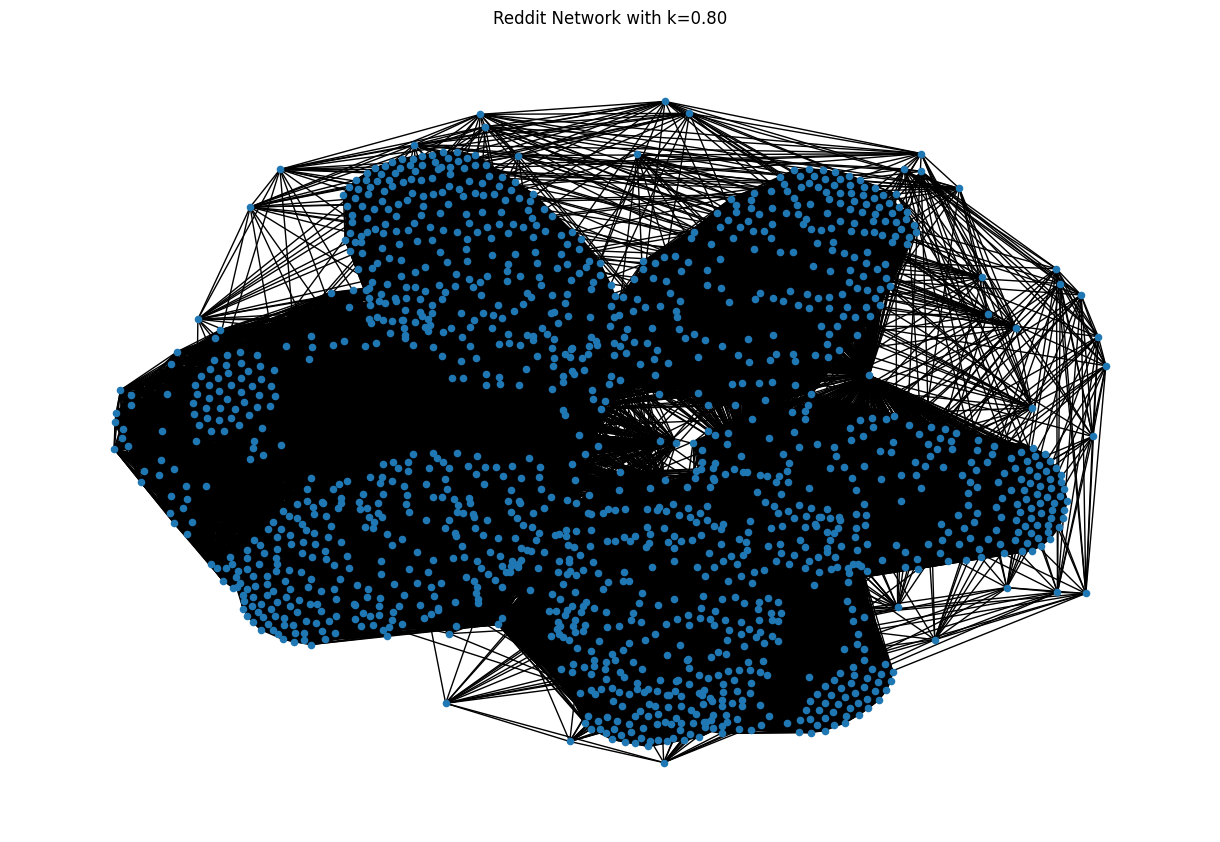

In [68]:
import networkx as nx

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.8, seed=42)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=False, node_size=20)
plt.title('Reddit Network with k=0.80')
plt.savefig('main network', dpi=300, bbox_inches='tight')
plt.show()


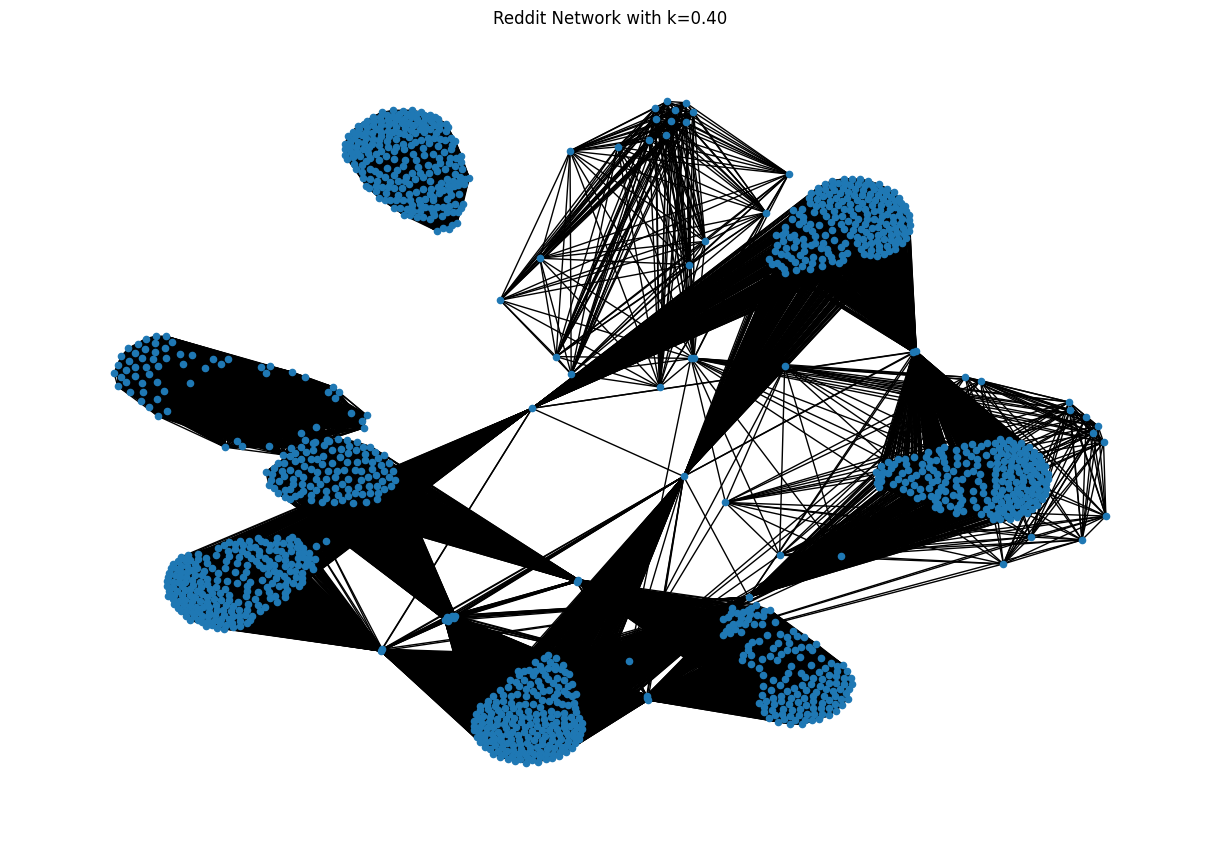

In [69]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.4,seed=42)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=False, node_size=20)
plt.title('Reddit Network with k=0.40')
plt.savefig('main network_2', dpi=300, bbox_inches='tight')
plt.show()


# Visualizing the network with Igraph.

In [70]:
colors = ig.drawing.colors.known_colors

g = ig.Graph.from_networkx(G)
g.vs["label"] = g.vs["_nx_name"]

visual_style = {}
#node size
visual_style["vertex_size"] = 20
#node color
visual_style["vertex_label_color"] = [random.choice(list(colors.keys())) for v in g.vs()]
#node label
visual_style["vertex_label"] = g.vs["label"]
#node shape
visual_style["vertex_shape"] = "hidden"
#label size
visual_style["vertex_label_size"] = [0.02*degree for degree in g.degree()]
#edge color
visual_style["edge_color"] = visual_style["vertex_label_color"]
#edge thickness
visual_style["edge_width"] = [0.001 *degree for degree in g.degree()]
#bounding box
visual_style["bbox"] = (1500, 1500)
#margin
visual_style["margin"] = 10
#layout
visual_style["layout"] = "fr"
#background
visual_style["background"] = "black"

ig.plot(g, "new_visulization.png", **visual_style)

# Network parametrs with Igraph

In [73]:

from igraph import Graph, plot as igplot

# Convert NetworkX graph to igraph graph
ig = Graph.TupleList(G.edges(), directed=False)

# Analyze network properties
print("Number of nodes:", ig.vcount())
print("Number of edges:", ig.ecount())

# Check if the graph is connected
if ig.is_connected():
    # Calculate properties for connected graphs
    print("Average clustering coefficient:", np.mean(ig.transitivity_local_undirected()))
    print("Network diameter:", ig.diameter())
else:
    print("The graph is not connected.")

# Node degrees
node_degrees = ig.degree()
print("Node degrees:", node_degrees)

# Clustering coefficient
clustering_coefficient = np.mean(ig.transitivity_local_undirected())
print("Average clustering coefficient:", clustering_coefficient)

# Communities
communities = ig.community_multilevel()
print("Communities:", communities)




Number of nodes: 1474
Number of edges: 145332
The graph is not connected.
Node degrees: [230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 434, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 458, 230, 230, 230, 458, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 2

# Cliques Visualization using networkx

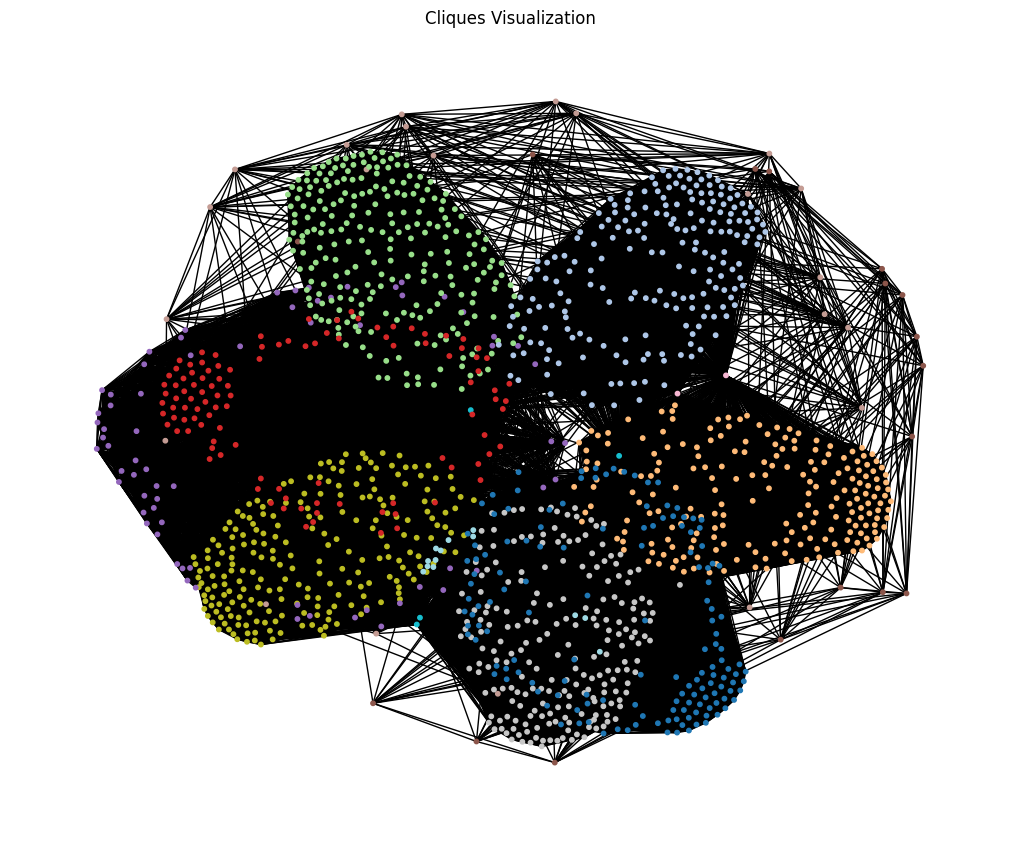

In [75]:

# Get the cliques
cliques = list(nx.find_cliques(G))

# Create a color map for nodes based on cliques
color_map = {}
for i, clique in enumerate(cliques):
    for node in clique:
        color_map[node] = i

# Plot the graph with nodes colored by cliques
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G,k=0.8, seed=42)
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=10, cmap=plt.cm.tab20)
plt.title('Cliques Visualization')
plt.savefig('Cliques_Visualization', dpi=300, bbox_inches='tight')
plt.show()


# Top influential users based on each centrality measure + visualization

In [76]:

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G,max_iter=1000, tol=1e-6)
# Sort users by centrality measures
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print top influential users based on each centrality measure
print("Top 10 Influential Users based on Degree Centrality:")
for user, centrality in sorted_degree:
    print(f"{user}: {centrality}")

print("\nTop 10 Influential Users based on Betweenness Centrality:")
for user, centrality in sorted_betweenness:
    print(f"{user}: {centrality}")

print("\nTop 10 Influential Users based on Eigenvector Centrality:")
for user, centrality in sorted_eigenvector:
    print(f"{user}: {centrality}")


Top 10 Influential Users based on Degree Centrality:
Reykmage: 0.31093007467752887
Any-Durian-299: 0.31093007467752887
StaleUnderwear: 0.296673455532926
tanneysnipes: 0.29463679565512557
Lionheart231: 0.2939579090291921
Salty_Green9586: 0.2790224032586558
AzureSirnight: 0.2790224032586558
ElCapitanBeans: 0.2572980312287848
JesseCruz07: 0.2572980312287848
Alternative_Bass_877: 0.2572980312287848

Top 10 Influential Users based on Betweenness Centrality:
StaleUnderwear: 0.11795655125594026
Lionheart231: 0.09393804667591661
tanneysnipes: 0.06461075936912744
Reykmage: 0.06394773802847327
Any-Durian-299: 0.06394773802847327
ElCapitanBeans: 0.04013644368952989
JesseCruz07: 0.04013644368952989
Alternative_Bass_877: 0.04013644368952989
Salty_Green9586: 0.030147608646457744
AzureSirnight: 0.030147608646457744

Top 10 Influential Users based on Eigenvector Centrality:
MAGI-System_: 0.06468443955085466
HailedFanatic: 0.06468443955085466
ItsJohnnySniper: 0.06468443955085466
toutoune134: 0.06468443

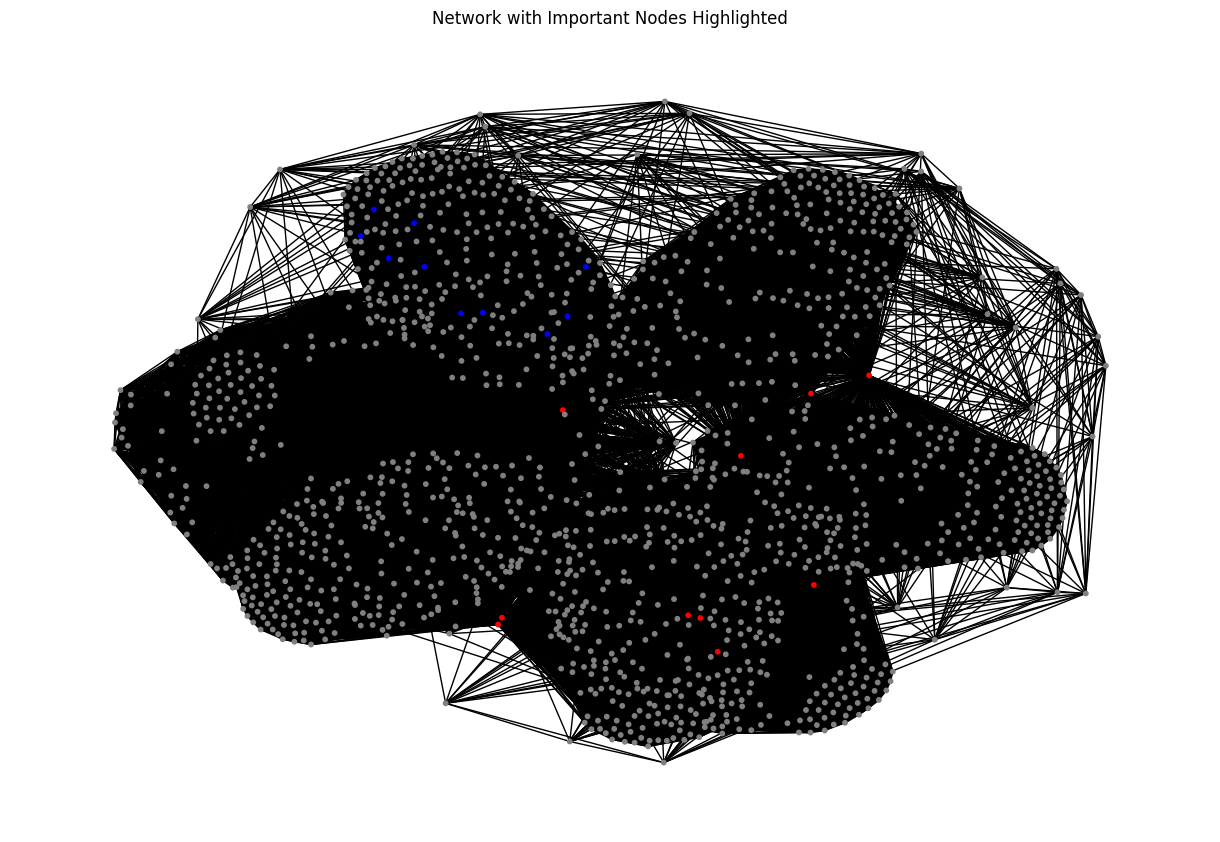

In [80]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G,max_iter=1000, tol=1e-6)

# Sort users by centrality measures
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Get the top influential users for each centrality measure
top_degree_users = [user for user, _ in sorted_degree]
top_betweenness_users = [user for user, _ in sorted_betweenness]
top_eigenvector_users = [user for user, _ in sorted_eigenvector]

# Create a mapping of node colors based on centrality measures
node_colors = {}
for node in G.nodes():
    if node in top_degree_users:
        node_colors[node] = 'red'
    elif node in top_betweenness_users:
        node_colors[node] = 'yellow'
    elif node in top_eigenvector_users:
        node_colors[node] = 'blue'
    else:
        node_colors[node] = 'gray'

# Visualize the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G,k=0.8, seed=42)
nx.draw(G, pos, with_labels=False, node_color=[node_colors[node] for node in G.nodes()], node_size=10, cmap=plt.cm.Blues)
plt.title('Network with Important Nodes Highlighted')
plt.savefig('Important nodes base on centrality', dpi=300, bbox_inches='tight')
plt.show()


# Community Detection Algorithms

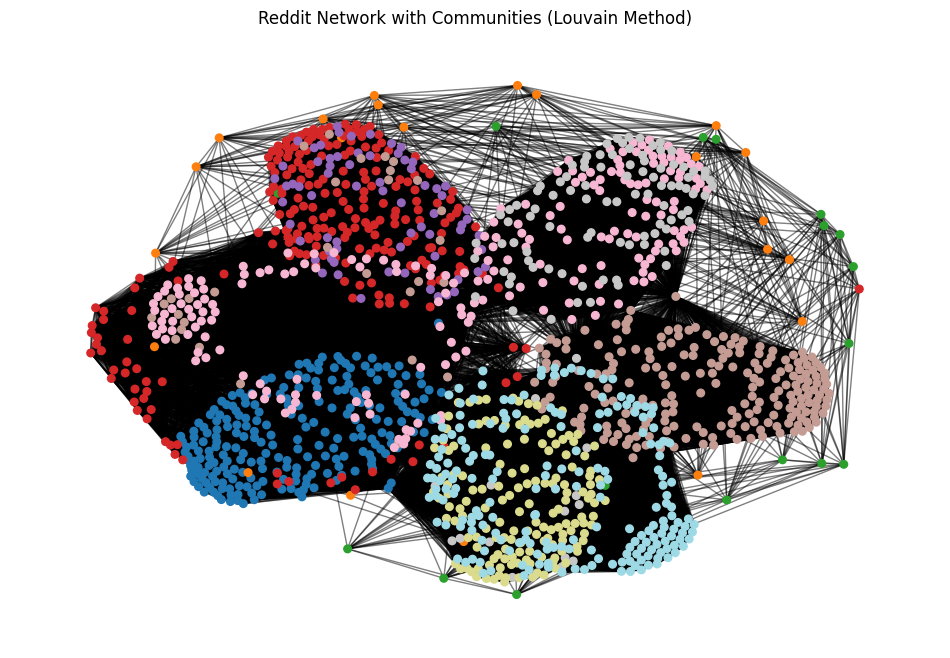

Modularity: 0.8210273311786692


In [79]:

import community
from community import community_louvain

# Compute the partition using the Louvain method
partition = community_louvain.best_partition(G)

# Convert the partition to the appropriate format
community_dict = {}
for node, community_id in partition.items():
    if community_id not in community_dict:
        community_dict[community_id] = []
    community_dict[community_id].append(node)

# Convert the dictionary to a list of sets
partition = [set(nodes) for nodes in community_dict.values()]

# Visualize the network with communities highlighted
plt.figure(figsize=(12, 8))

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.8, seed=42)

# Draw nodes and edges, color nodes based on community
node_colors = [i for i in range(len(partition)) for _ in partition[i]]
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.tab20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)


plt.title('Reddit Network with Communities (Louvain Method)')
plt.axis('off')
plt.savefig('community_louvain', dpi=300, bbox_inches='tight')
plt.show()

# Compute modularity
modularity = nx.community.modularity(G, partition)
print("Modularity:", modularity)


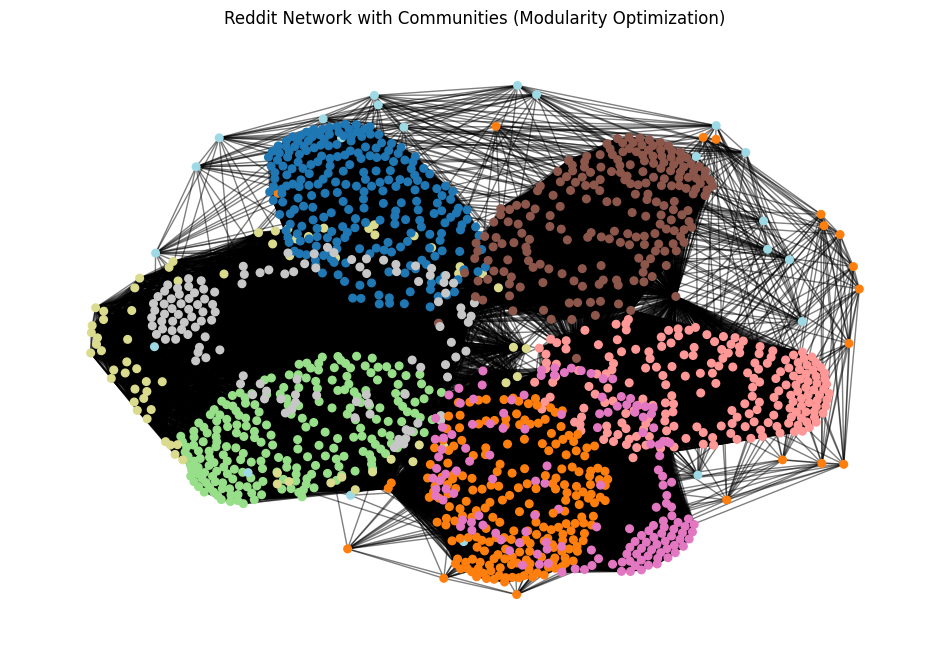

Modularity: 0.815987312449947


In [81]:
# Detect communities using modularity optimization
communities = list(nx.algorithms.community.greedy_modularity_communities(G.to_undirected()))

# Create a mapping of nodes to their respective communities
node_community_mapping = {node: i for i, community in enumerate(communities) for node in community}

# Visualize the network with communities highlighted
plt.figure(figsize=(12, 8))

# Position nodes using spring layout
pos = nx.spring_layout(G,k=0.8, seed=42)

# Draw nodes and edges, color nodes based on community
node_colors = [node_community_mapping[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.tab20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Reddit Network with Communities (Modularity Optimization)')
plt.axis('off')
plt.savefig('greedy_modularity', dpi=300, bbox_inches='tight')
plt.show()

modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

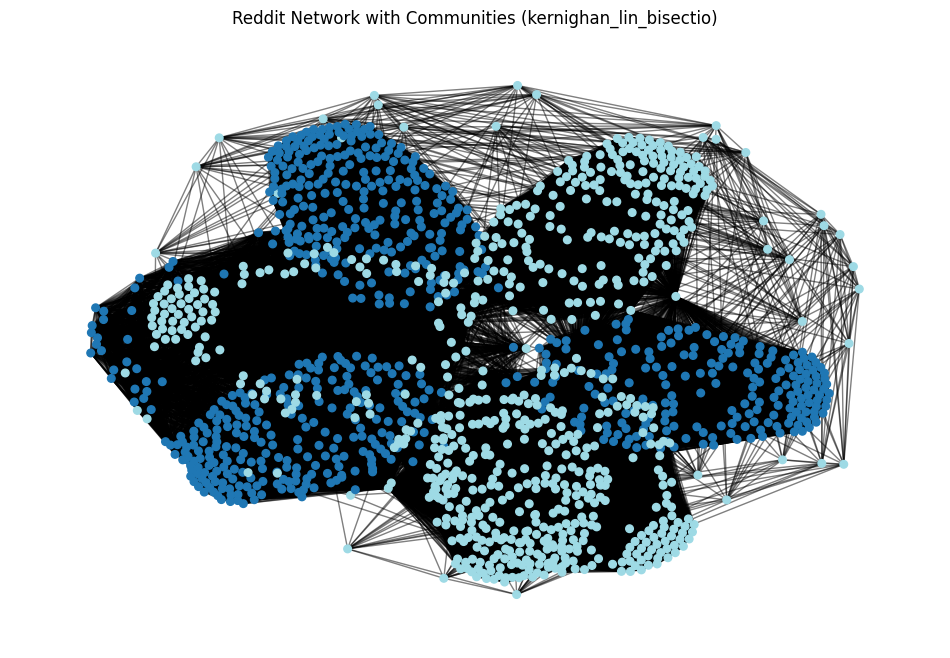

Modularity: 0.48589712004015817


In [82]:
import networkx as nx

# Detect communities using Bipartitions
communities = list(nx.algorithms.community.kernighan_lin_bisection(G))
# Create a mapping of nodes to their respective communities
node_community_mapping = {node: i for i, community in enumerate(communities) for node in community}

# Visualize the network with communities highlighted
plt.figure(figsize=(12, 8))

# Position nodes using spring layout
pos = nx.spring_layout(G,k=0.8,seed=42)

# Draw nodes and edges, color nodes based on community
node_colors = [node_community_mapping[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.tab20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Reddit Network with Communities (kernighan_lin_bisectio)')
plt.savefig('kernighan_lin_bisectio', dpi=300, bbox_inches='tight')
plt.axis('off')
plt.show()

modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

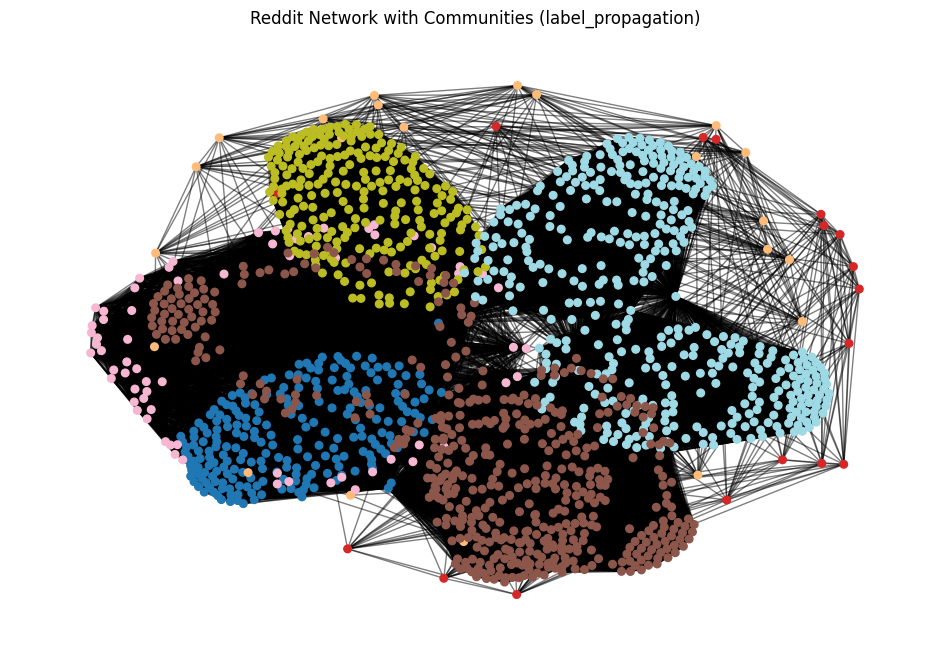

Modularity: 0.7392119543774466


In [83]:
import networkx as nx

# Detect communities using Label Propagation
communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))
# Create a mapping of nodes to their respective communities
node_community_mapping = {node: i for i, community in enumerate(communities) for node in community}

# Visualize the network with communities highlighted
plt.figure(figsize=(12, 8))

# Position nodes using spring layout
pos = nx.spring_layout(G,k=0.8,seed=42)

# Draw nodes and edges, color nodes based on community
node_colors = [node_community_mapping[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=30, cmap=plt.cm.tab20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('Reddit Network with Communities (label_propagation)')
plt.axis('off')
plt.savefig('label_propagation', dpi=300, bbox_inches='tight')
plt.show()

modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

In [84]:
import networkx as nx
from community import community_louvain
# 1. Community Detection using louvain
partition = community_louvain.best_partition(G)

# 2. Inter-Community Analysis
# Counting inter-community edges
inter_community_edges = {(partition[u], partition[v]) for u, v in G.edges() if partition[u] != partition[v]}
print("Inter-community edges:", len(inter_community_edges))

community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = list(partition.values()).count(community_id)
print("Community Sizes:", community_sizes)


Inter-community edges: 16
Community Sizes: {0: 201, 1: 239, 2: 228, 3: 17, 4: 231, 5: 208, 6: 22, 7: 150, 8: 69, 9: 109}


In [85]:
import networkx as nx

# 1. Community Detection using Greedy Modularity
communities = list(nx.algorithms.community.greedy_modularity_communities(G))

# Create a partition dictionary where keys are nodes and values are community IDs
partition = {}
for idx, comm in enumerate(communities):
    for node in comm:
        partition[node] = idx

# 2. Inter-Community Analysis
# Counting inter-community edges
inter_community_edges = {(partition[u], partition[v]) for u, v in G.edges() if partition[u] != partition[v]}
print("Inter-community edges:", len(inter_community_edges))

# Compute community sizes
community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = list(partition.values()).count(community_id)
print("Community Sizes:", community_sizes)


Inter-community edges: 19
Community Sizes: {0: 239, 1: 234, 2: 228, 3: 207, 4: 205, 5: 151, 6: 119, 7: 69, 8: 22}


In [86]:
import networkx as nx

# 1. Community Detection using Bipartitions
communities = list(nx.algorithms.community.kernighan_lin_bisection(G))

# Create a partition dictionary where keys are nodes and values are community IDs
partition = {}
for idx, comm in enumerate(communities):
    for node in comm:
        partition[node] = idx

# 2. Inter-Community Analysis
# Counting inter-community edges
inter_community_edges = {(partition[u], partition[v]) for u, v in G.edges() if partition[u] != partition[v]}
print("Inter-community edges:", len(inter_community_edges))

# Compute community sizes
community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = list(partition.values()).count(community_id)
print("Community Sizes:", community_sizes)


Inter-community edges: 2
Community Sizes: {0: 737, 1: 737}


In [87]:
import networkx as nx

# 1. Community Detection using Label Propagation
communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))

# Create a partition dictionary where keys are nodes and values are community IDs
partition = {}
for idx, comm in enumerate(communities):
    for node in comm:
        partition[node] = idx

# 2. Inter-Community Analysis
# Counting inter-community edges
inter_community_edges = {(partition[u], partition[v]) for u, v in G.edges() if partition[u] != partition[v]}
print("Inter-community edges:", len(inter_community_edges))

# Compute community sizes
community_sizes = {}
for community_id in set(partition.values()):
    community_sizes[community_id] = list(partition.values()).count(community_id)
print("Community Sizes:", community_sizes)


Inter-community edges: 6
Community Sizes: {0: 231, 1: 22, 2: 17, 3: 487, 4: 69, 5: 239, 6: 409}


In [88]:

from collections import defaultdict

# 3. Compute Community Overlap
community_overlap = defaultdict(set)
for node, communities in partition.items():
    if isinstance(communities, int):
        communities = [communities]  # Convert a single community ID to a list
    for community in communities:
        community_overlap[node].add(community)
# Print the results of community overlap
for node, communities in community_overlap.items():
    print(f"Node {node} belongs to communities: {communities}")


Node wilsbrough belongs to communities: {0}
Node RoSannKeMon belongs to communities: {0}
Node Double-Comparison442 belongs to communities: {0}
Node jaythestar216 belongs to communities: {0}
Node oliverto8 belongs to communities: {0}
Node Celiske belongs to communities: {0}
Node psyecology belongs to communities: {0}
Node stumpadump belongs to communities: {0}
Node Da_Vinci_B belongs to communities: {0}
Node crazyinout belongs to communities: {0}
Node T7MPR belongs to communities: {0}
Node tanneysnipes belongs to communities: {0}
Node Comfortable_Ad1473 belongs to communities: {0}
Node BraveSeminole7 belongs to communities: {0}
Node Total-Boysenberry454 belongs to communities: {0}
Node TheeJayBird belongs to communities: {0}
Node TheReal_DrFunTimes belongs to communities: {0}
Node kaprosuch belongs to communities: {0}
Node Comfortable-Swim-963 belongs to communities: {0}
Node csmithson91 belongs to communities: {0}
Node zedalav belongs to communities: {0}
Node Effective-Nothing346 belon

# hits_scores + visualization

In [25]:
# Compute HITS scores
hits_scores = nx.hits(G)

# Extract authority and hub scores
authority_scores = hits_scores[0]
hub_scores = hits_scores[1]

# Print scores for each node
for node, authority_score in authority_scores.items():
    print(f"Node {node}: Authority Score = {authority_score}, Hub Score = {hub_scores[node]}")



Node jaythestar216: Authority Score = -3.1058268387329348e-18, Hub Score = 0.0
Node CrispyPotatox05: Authority Score = -3.0927969537847215e-18, Hub Score = -3.101112617674711e-18
Node psychoPRN: Authority Score = -3.0920436153030874e-18, Hub Score = -3.2804071763036754e-18
Node Aromatic-Sail-9885: Authority Score = -3.092058143185623e-18, Hub Score = -3.276949540260152e-18
Node Complete-Tangelo7316: Authority Score = -3.088598716574359e-18, Hub Score = -4.1002930737410095e-18
Node israelmarques: Authority Score = -3.0929762778480993e-18, Hub Score = -3.0584334905908743e-18
Node Pokemonaddict40: Authority Score = -3.0927569430674586e-18, Hub Score = -3.1106351683833406e-18
Node Educational_Club9558: Authority Score = -3.0920205011513735e-18, Hub Score = -3.285908344411611e-18
Node Fit-Pizza-1120: Authority Score = -3.092366737848003e-18, Hub Score = -3.2035040106137263e-18
Node MasterPeteDiddy: Authority Score = -3.0885246859297323e-18, Hub Score = -4.11791236716215e-18
Node DulcitaYama

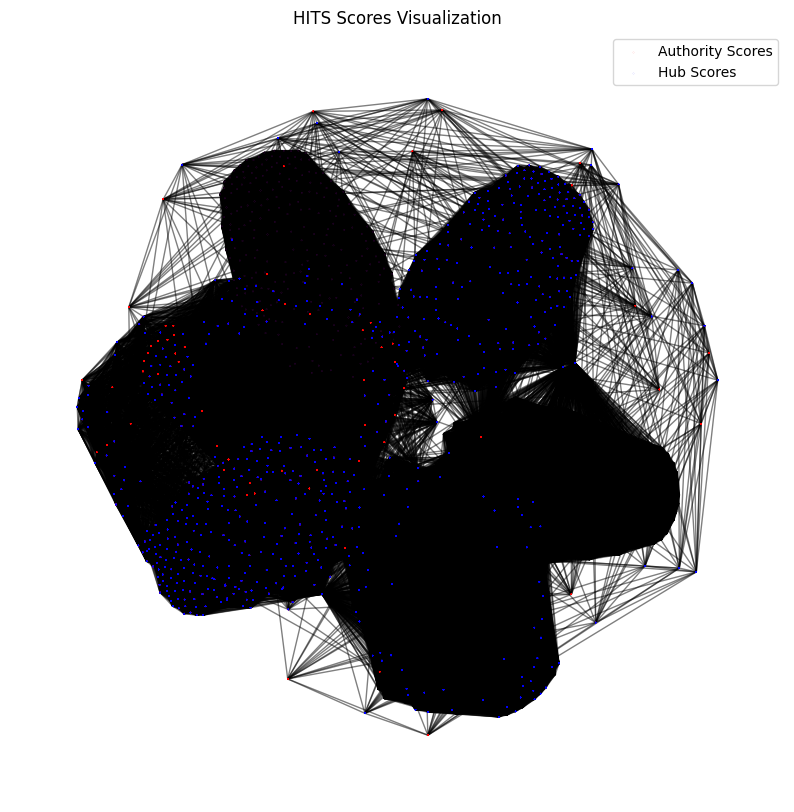

In [26]:
# Compute HITS scores
hits_scores = nx.hits(G)

# Extract authority and hub scores
authority_scores = hits_scores[0]
hub_scores = hits_scores[1]

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G,k=0.8,seed=42)

# Draw nodes with sizes based on authority scores
nx.draw_networkx_nodes(G, pos, node_size=[score for score in authority_scores.values()],
                       node_color='red', label='Authority Scores')

# Draw nodes with sizes based on hub scores
nx.draw_networkx_nodes(G, pos, node_size=[score for score in hub_scores.values()],
                       node_color='blue', label='Hub Scores')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.title('HITS Scores Visualization')
plt.savefig('HITS Scores', dpi=300, bbox_inches='tight')
plt.legend()
plt.axis('off')
plt.show()


# PageRank Visualization + Analysis


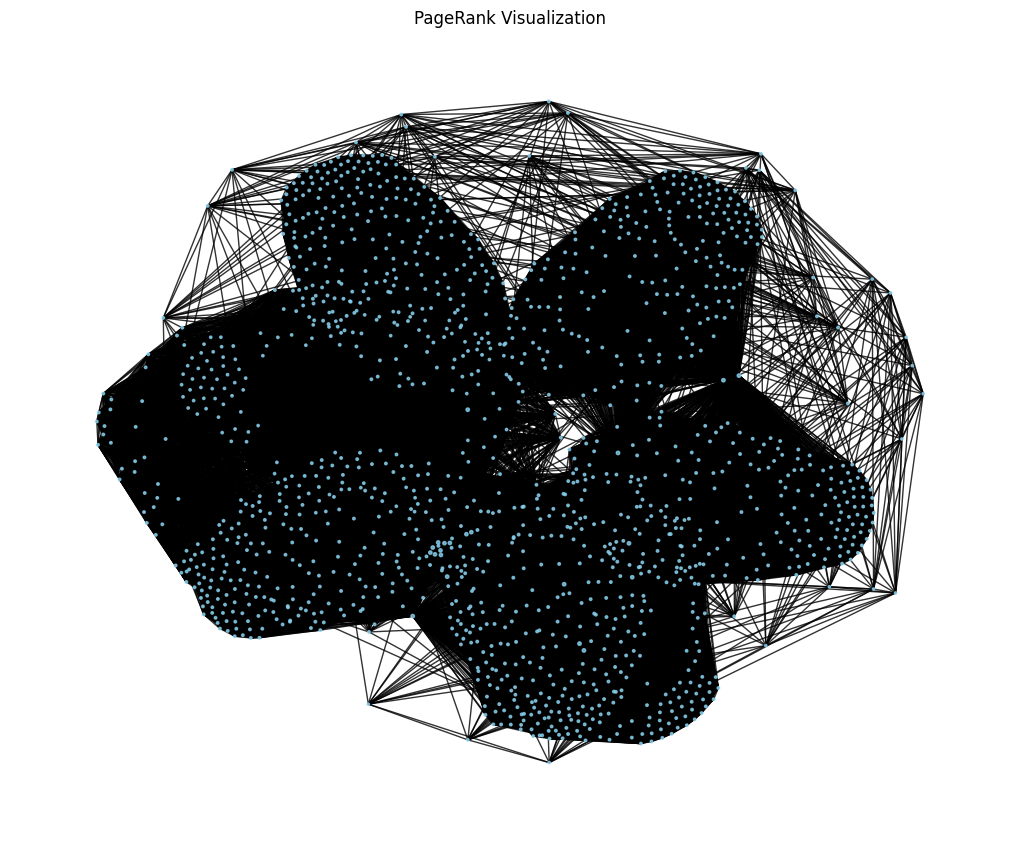

In [16]:
# PageRank Visualization
pagerank = nx.pagerank(G)
sizes = [5000 * rank for rank in pagerank.values()]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G,k=0.8, seed=42)
nx.draw(G, pos, node_size=sizes, with_labels=False, node_color='skyblue', alpha=0.8)
plt.title('PageRank Visualization')
plt.axis('off')
plt.savefig('pagerank', dpi=300, bbox_inches='tight')
plt.show()




In [17]:
# Analyze PageRank Scores
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Top 10 nodes by PageRank scores:")
for node, score in sorted_pagerank[:10]:
    print(f"Node: {node}, PageRank Score: {score}")

Top 10 nodes by PageRank scores:
Node: Any-Durian-299, PageRank Score: 0.0012682329944839847
Node: Reykmage, PageRank Score: 0.0012682329944839847
Node: StaleUnderwear, PageRank Score: 0.0012668453931909134
Node: Lionheart231, PageRank Score: 0.0012642561234975226
Node: ElCapitanBeans, PageRank Score: 0.0012562092159689724
Node: Alternative_Bass_877, PageRank Score: 0.0012562092159689724
Node: JesseCruz07, PageRank Score: 0.0012562092159689724
Node: tanneysnipes, PageRank Score: 0.001245458355561507
Node: Salty_Green9586, PageRank Score: 0.001244046613343483
Node: AzureSirnight, PageRank Score: 0.001244046613343483


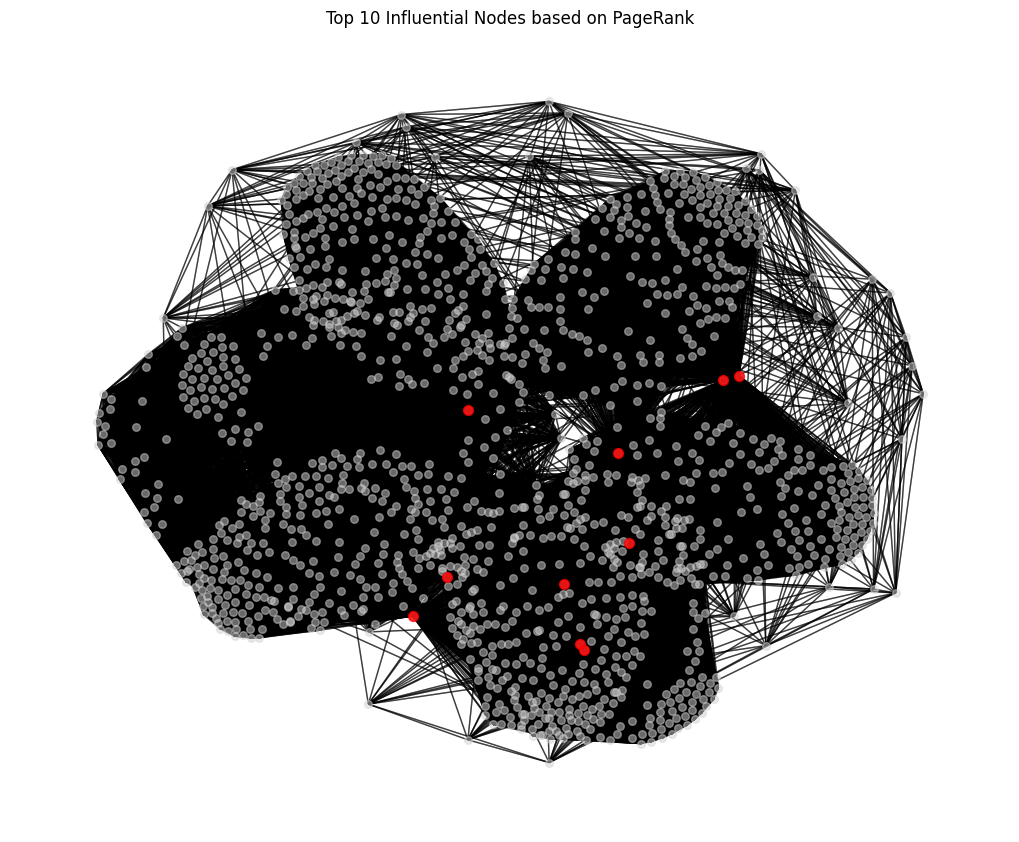

In [22]:
# Sort nodes based on PageRank scores
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 influential nodes
top_10_nodes = dict(sorted_pagerank[:10])

# Calculate sizes for visualization
sizes_top_10 = [5000 * rank for rank in top_10_nodes.values()]

# Create a new graph with only the top 10 influential nodes and their edges
G_top_10 = G.subgraph(top_10_nodes.keys())

# Create a new figure and axis
plt.figure(figsize=(10, 8))

# Draw the entire network
pos = nx.spring_layout(G, k=0.8, seed=42)
nx.draw(G, pos, node_size=30, with_labels=False, node_color='lightgray', alpha=0.5)

# Draw the top 10 influential nodes with a different color
nx.draw_networkx_nodes(G, pos, nodelist=top_10_nodes.keys(), node_size=50, node_color='red', alpha=0.8)

# Add edges to the plot
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Set plot title and axis off
plt.title('Top 10 Influential Nodes based on PageRank')
plt.axis('off')

plt.savefig('top_10_pagerank_with_network', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

